In [19]:
# import zipfile

# def unzip_file(zip_file_path, extract_to_path):
#     with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#         zip_ref.extractall(extract_to_path)

# # Example usage:
# zip_file_path = "/Users/risal/My_Codes/Projectdataminor/ModelCNN/birdsDataSet.zip"
# extract_to_path = '/ModelCNN//Users/risal/My_Codes/Projectdataminor/ModelCNN/Birds'

# unzip_file(zip_file_path, extract_to_path)

In [15]:
# print(zip_file_path)
# print(extract_to_path)

/Users/risal/My_Codes/Projectdataminor/ModelCNN/birdsDataSet.zip
/ModelCNN/


In [7]:
import os
os.chdir('/ModelCNN/')

In [8]:
import os
import numpy as np
import torch
import glob  ## finds all the pathnames matching a specified pattern
import torch.nn as nn   # helps build neural network models
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable   ## for automatic differentiation that performs back propagation
import torchvision
import pathlib   #  provides various classes representing file system paths with semantics appropriate for different operating systems

In [9]:
# check whcih  device to train is available
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device , "is available")

cuda is available


In [10]:
trnsfrm=transforms.Compose([
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    # added --
    transforms.RandomRotation(degrees=15),
    transforms.RandomResizedCrop(150, scale=(0.8, 1.0), ratio=(0.75, 1.333)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
   #--
    transforms.ToTensor(),  # conversion of  numpy to tensors, since pytorch processes data in tensors
    transforms.Normalize([0.5,0.5,0.5], # normalize using mean and standard deviation
                        [0.5,0.5,0.5])
])

In [21]:
# Pytorch  Dataloader

# C:\Users\risal\My_Codes\Projectdataminor\ModelCNN\birdsDataSet.zip\Dataset
## training and testing directory path
train_path='/Users/risal/My_Codes/Projectdataminor/ModelCNN/Birds/Dataset/train'
val_path='/Users/risal/My_Codes/Projectdataminor/ModelCNN/Birds/Dataset/val'

train_loader=DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=trnsfrm),
    batch_size=64, shuffle=True
)
val_loader=DataLoader(
    torchvision.datasets.ImageFolder(val_path,transform=trnsfrm),
    batch_size=32, shuffle=True   # batch size edited
)

In [22]:
#categories
root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])

In [23]:
print(classes)  ## for all birds

['Abbott’s Babbler Malacocincla abbotti', 'Black Bittern (Dupetor flavicollis)', 'Blue-eared Kingfisher Alcedo meninting', 'Blue-naped Pitta Pitta nipalensis', 'Broad-billed Warbler Tickellia hodgsoni', 'Cheer Pheasant (Catreus wallichii)', 'Chestnut Munia Lonchura atricapilla', 'Cinereous Vulture Aegypius monachus', 'Golden Babbler Stachyris chrysaea', 'Gould’s Shortwing Brachypteryx stellata', 'Great Bittern Botaurus stellaris', 'Great Hornbill (Buceros bicornis)', 'Great Slaty Woodpecker Mulleripicus pulverulentus', 'Ibisbill Ibidorhyncha struthersii', 'Indian Courser Cursorius coromandelicus', 'Indian Grassbird - Graminicola bengalensis', 'Indian Nightjar Caprimulgus asiaticus', 'Knob-billed Duck Sarkidiornis melanotos', 'Northern Pintail Anas acuta', 'Painted Stork Mycteria leucocephala', 'Purple Cochoa Cochoa purpurea', 'Red-headed Trogon Harpactes erythrocephalus', 'Red-headed Vulture Sarcogyps calvus', 'Red-necked Falcon Falco chicquera', 'Ruby-cheeked Sunbird Anthreptes singal

In [24]:
### Convolution netwrok module
class ConvNet(nn.Module):
    def __init__(self, num_classes=38, kernel_size_conv1=3, in_channels=3,
                 out_channels_conv1=12, out_channels_conv2=20, kernel_size_conv2=3,
                 out_channels_conv3=32, kernel_size_conv3=3, num_features_batchnorm=32,
                 kernel_size_maxpool=2, dropout_prob=0.5):
        super(ConvNet, self).__init__()

        # Input shape = (batch size, channels, width, height) = (64, 3, 150, 150)
        self.conv1 = nn.Conv2d(in_channels, out_channels_conv1, kernel_size_conv1,
                               stride=1, padding=1)
        self.btch1 = nn.BatchNorm2d(num_features=out_channels_conv1)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=kernel_size_maxpool)

        self.conv2 = nn.Conv2d(out_channels_conv1, out_channels_conv2, kernel_size_conv2,
                               stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=dropout_prob)

        self.conv3 = nn.Conv2d(out_channels_conv2, out_channels_conv3, kernel_size_conv3,
                               stride=1, padding=1)
        self.btch3 = nn.BatchNorm2d(num_features=out_channels_conv3)
        self.relu3 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=dropout_prob)

        self.fc = nn.Linear(in_features=75 * 75 * out_channels_conv3, out_features=num_classes)

    # def __init__(self,num_classes=38):
    #     super(ConvNet,self).__init__()


    #     #Input shape=(batch size, channles, width, height) =  (64 ,3,150,150)

    #     self.conv1=nn.Conv2d(in_channels=3,out_channels=12,kernel_size=3,stride=1,padding=1)
    #     #Shape= (256,12,150,150)

    #     self.btch1=nn.BatchNorm2d(num_features=12)
    #     #Shape= (256,12,150,150)
    #     self.relu1=nn.ReLU()
    #     #Shape= (256,12,150,150)

    #     self.pool=nn.MaxPool2d(kernel_size=2)
    #     #Reduce the image ht and width by a  factor  of 2, so Shape= (256,12,75,75)


    #     self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
    #     #Shape= (256,20,75,75)

    #     self.relu2=nn.ReLU()    #Shape= (256,20,75,75)

    #     #FOR Regularization
    #     # Dropout layers

    #     self.dropout1 = nn.Dropout(p=0.5)  # Adjust dropout probability as needed
    #     self.dropout2 = nn.Dropout(p=0.5)


    #     self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
    #     #Shape= (256,32,75,75)
    #     self.btch3=nn.BatchNorm2d(num_features=32)
    #     #Shape= (256,32,75,75)
    #     self.relu3=nn.ReLU()
    #     #Shape= (256,32,75,75)


    #     self.fc=nn.Linear(in_features=75 * 75 * 32,out_features=num_classes)



        #Feed forwad function

    def forward(self,input):
        ot_put = self.conv1(input)
        ot_put=self.btch1(ot_put)
        ot_put=self.relu1(ot_put)

        ot_put=self.pool(ot_put)

        ot_put=self.conv2(ot_put)
        ot_put=self.relu2(ot_put)
        ot_put = self.dropout1(ot_put)  # Apply dropout after activation

        ot_put=self.conv3(ot_put)
        ot_put=self.btch3(ot_put)
        ot_put=self.relu3(ot_put)
        ot_put = self.dropout2(ot_put)  # Apply dropout after activation'''


            #Above output will be in matrix form, with shape (256,32,75,75)

        ot_put=ot_put.view(-1,32*75*75)  ## reshape the output from above and feed into fully connected layer


        ot_put=self.fc(ot_put)

        return ot_put


In [25]:
mdl=ConvNet(num_classes=38).to(device)

In [26]:
lr=0.00001
optmzer=Adam(mdl.parameters(),lr=0.00001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()

In [27]:
num_epochs=20

In [28]:
# Total size of training and testing images
train_count=len(glob.glob(train_path+'/**/*.png'))
val_count=len(glob.glob(val_path+'/**/*.png'))
print(train_count,val_count)

6983 367


Epoch: 0 Train Loss: tensor(2.4271) Train Accuracy: 0.4183015895746814 val Accuracy: 0.4822888283378747 val Loss: 2.344374321462023
Epoch: 1 Train Loss: tensor(2.3442) Train Accuracy: 0.44579693541457827 val Accuracy: 0.5122615803814714 val Loss: 2.221791140065206
Epoch: 2 Train Loss: tensor(2.2380) Train Accuracy: 0.4801661177144494 val Accuracy: 0.5422343324250681 val Loss: 2.137169422180841
Epoch: 3 Train Loss: tensor(2.1940) Train Accuracy: 0.4883287985106688 val Accuracy: 0.5367847411444142 val Loss: 2.051863602136721
Epoch: 4 Train Loss: tensor(2.1432) Train Accuracy: 0.4959186596018903 val Accuracy: 0.5722070844686649 val Loss: 1.9766184354672964
Epoch: 5 Train Loss: tensor(2.1002) Train Accuracy: 0.5096663325218388 val Accuracy: 0.5776566757493188 val Loss: 1.9964162582272729
Epoch: 6 Train Loss: tensor(2.0546) Train Accuracy: 0.5258484891880281 val Accuracy: 0.55858310626703 val Loss: 2.005127007045278
Epoch: 7 Train Loss: tensor(2.0225) Train Accuracy: 0.5393097522554776 val 

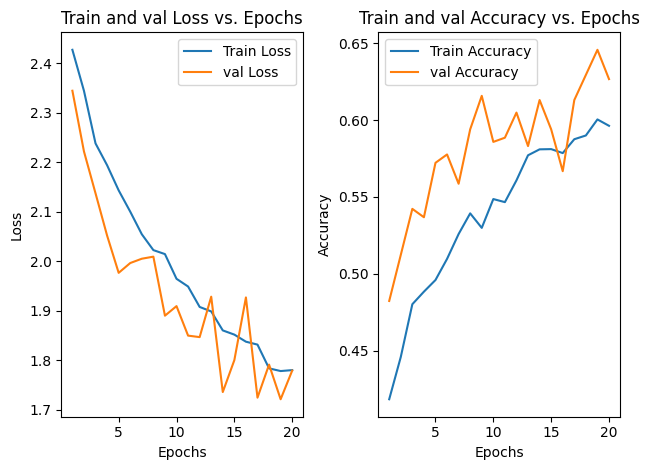

In [31]:
import matplotlib.pyplot as plt

# Lists to store accuracy and loss values
train_accuracy_list = []
train_loss_list = []
val_accuracy_list = []
val_loss_list = []

# Dictionaries to store train and val metrics for each epoch
epoch_metrics = {
    'train_accuracy': {},
    'train_loss': {},
    'val_accuracy': {},
    'val_loss': {}
}



best_accuracy = 0.0

for epoch in range(num_epochs):

     #Evaluation and training on training dataset
    mdl.train()
    train_accuracy = 0.0
    train_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())

        optmzer.zero_grad()

        outputs = mdl(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optmzer.step()

        train_loss += loss.cpu().data * images.size(0)
        _, prediction = torch.max(outputs.data, 1)

        train_accuracy += int(torch.sum(prediction == labels.data))

    train_accuracy = train_accuracy / train_count
    train_loss = train_loss / train_count

    # Evaluation on Val dataset
    mdl.eval()

    val_accuracy = 0.0
    val_loss = 0.0
    for i, (images, labels) in enumerate(val_loader):
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())

        outputs = mdl(images)
        _, prediction = torch.max(outputs.data, 1)
        val_accuracy += int(torch.sum(prediction == labels.data))
        val_loss += loss_function(outputs, labels).cpu().item() * images.size(0)


    val_accuracy = val_accuracy / val_count
    val_loss = val_loss / val_count

    # Append accuracy and loss values to the lists
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(train_loss)
    val_accuracy_list.append(val_accuracy)
    val_loss_list.append(val_loss)


    # Store train and val metrics in dictionaries
    epoch_metrics['train_accuracy'][epoch] = train_accuracy
    epoch_metrics['train_loss'][epoch] = train_loss
    epoch_metrics['val_accuracy'][epoch] = val_accuracy
    epoch_metrics['val_loss'][epoch] = val_loss


    print('Epoch: ' + str(epoch) + ' Train Loss: ' + str(train_loss) + ' Train Accuracy: ' + str(
        train_accuracy) + ' val Accuracy: ' + str(val_accuracy) + ' val Loss: ' + str(val_loss))

    # Save the best model
    if val_accuracy > best_accuracy:
        torch.save(mdl.state_dict(), 'good_chkpnt1.model')
        best_accuracy = val_accuracy

# Plotting the train and val loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_loss_list, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_loss_list, label='val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and val Loss vs. Epochs')
plt.legend()

# Plotting the train and val accuracy in one graph
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracy_list, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracy_list, label='val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and val Accuracy vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
# import pandas as pd
# import matplotlib.pyplot as plt

# best_accuracy=0.0

# train_accuracy_list = []
# val_accuracy_list=[]

# for epoch in range(num_epochs):

#     #Evaluation and training on training dataset
#     mdl.train()
#     train_accuracy=0.0
#     train_loss=0.0

#     for i, (images,labels) in enumerate(train_loader):
#         if torch.cuda.is_available():
#             images=Variable(images.cuda())
#             labels=Variable(labels.cuda())

#         optmzer.zero_grad()

#         outputs=mdl(images)
#         loss=loss_function(outputs,labels)
#         loss.backward()
#         optmzer.step()


#         train_loss+= loss.cpu().data*images.size(0)
#         _,prediction=torch.max(outputs.data,1)

#         train_accuracy+=int(torch.sum(prediction==labels.data))

#     train_accuracy=train_accuracy/train_count
#     train_loss=train_loss/train_count
#     train_accuracy_list.append(train_accuracy)


#     # Evaluation on testing dataset
#     mdl.eval()

#     val_accuracy=0.0
#     for i, (images,labels) in enumerate(val_loader):
#         if torch.cuda.is_available():
#             images=Variable(images.cuda())
#             labels=Variable(labels.cuda())

#         outputs=mdl(images)
#         _,prediction=torch.max(outputs.data,1)
#         val_accuracy+=int(torch.sum(prediction==labels.data))

#     val_accuracy=val_accuracy/val_count
#     val_accuracy_list.append(val_accuracy)

#     print('Epoch: '+str(epoch)+' Train Loss: '+str(train_loss)+' Train Accuracy: '+str(train_accuracy)+' Test Accuracy: '+str(val_accuracy))

#     #Save the best model
#     if val_accuracy>best_accuracy:
#         torch.save(mdl.state_dict(),'good_chkpnt16.model')
#         best_accuracy=val_accuracy


# # Plotting the accuracies over epochs
# plt.plot(range(num_epochs), train_accuracy_list, label='Train Accuracy')
# plt.plot(range(num_epochs), val_accuracy_list, label='val Accuracy')
# plt.title('Accuracy Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)
# plt.show()

MODEL TEST

In [37]:
import torch
import torch.nn as nn
from torchvision.transforms import transforms
import numpy as np
from torch.autograd import Variable
from torchvision.models import squeezenet1_1
import torch.functional as F
from io import open
import os
from PIL import Image
import pathlib
import glob
import cv2

In [38]:
#categories
root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])

In [67]:
### Convolution netwrok module
class ConvNet(nn.Module):
    def __init__(self, num_classes=38, kernel_size_conv1=3, in_channels=3,
                 out_channels_conv1=12, out_channels_conv2=20, kernel_size_conv2=3,
                 out_channels_conv3=32, kernel_size_conv3=3, num_features_batchnorm=32,
                 kernel_size_maxpool=2, dropout_prob=0.5):
        super(ConvNet, self).__init__()

        # Input shape = (batch size, channels, width, height) = (64, 3, 150, 150)
        self.conv1 = nn.Conv2d(in_channels, out_channels_conv1, kernel_size_conv1,
                               stride=1, padding=1)
        self.btch1 = nn.BatchNorm2d(num_features=out_channels_conv1)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=kernel_size_maxpool)

        self.conv2 = nn.Conv2d(out_channels_conv1, out_channels_conv2, kernel_size_conv2,
                               stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=dropout_prob)

        self.conv3 = nn.Conv2d(out_channels_conv2, out_channels_conv3, kernel_size_conv3,
                               stride=1, padding=1)
        self.btch3 = nn.BatchNorm2d(num_features=out_channels_conv3)
        self.relu3 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=dropout_prob)

        self.fc = nn.Linear(in_features=75 * 75 * out_channels_conv3, out_features=num_classes)
    
    # def __init__(self,num_classes=38):   # number of classes 37 huna parxaa a
    #     super(ConvNet,self).__init__()


    #     #Input shape=(batch size, channles, width, height) =  (64 ,3,150,150)

    #     self.conv1=nn.Conv2d(in_channels=3,out_channels=12,kernel_size=3,stride=1,padding=1)
    #     #Shape= (256,12,150,150)

    #     self.btch1=nn.BatchNorm2d(num_features=12)
    #     #Shape= (256,12,150,150)
    #     self.relu1=nn.ReLU()
    #     #Shape= (256,12,150,150)

    #     self.pool=nn.MaxPool2d(kernel_size=2)
    #     #Reduce the image ht and width by a  factor  of 2, so Shape= (256,12,75,75)


    #     self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
    #     #Shape= (256,20,75,75)

    #     self.relu2=nn.ReLU()    #Shape= (256,20,75,75)

    #       #FOR Regularization
    #       # Dropout layers

    #     self.dropout1 = nn.Dropout(p=0.5)  # Adjust dropout probability as needed
    #     self.dropout2 = nn.Dropout(p=0.5)




    #     self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
    #     #Shape= (256,32,75,75)
    #     self.btch3=nn.BatchNorm2d(num_features=32)
    #     #Shape= (256,32,75,75)
    #     self.relu3=nn.ReLU()
    #     #Shape= (256,32,75,75)


    #     self.fc=nn.Linear(in_features=75 * 75 * 32,out_features=num_classes)



    #     #Feed forwad function

    def forward(self,input):
        ot_put = self.conv1(input)
        ot_put=self.btch1(ot_put)
        ot_put=self.relu1(ot_put)

        ot_put=self.pool(ot_put)

        ot_put=self.conv2(ot_put)
        ot_put=self.relu2(ot_put)
        ot_put = self.dropout2(ot_put) ## Apply dropout after activation

        ot_put=self.conv3(ot_put)
        ot_put=self.btch3(ot_put)
        ot_put=self.relu3(ot_put)
        ot_put = self.dropout2(ot_put)  # Apply dropout after activation


            #Above output will be in matrix form, with shape (256,32,75,75)

        ot_put=ot_put.view(-1,32*75*75)  ## reshape the output from above and feed into fully connected layer


        ot_put=self.fc(ot_put)

        return ot_put




In [40]:
checkpoint=torch.load('good_chkpnt1.model')
model=ConvNet(num_classes=38) # num_classes 38 huna parxa
model.load_state_dict(checkpoint)
model.eval()

ConvNet(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (btch1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (btch3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc): Linear(in_features=180000, out_features=38, bias=True)
)

In [41]:
#Transform test data
trnsfrm=transforms.Compose([
    transforms.Resize((150,150)),
    transforms.ToTensor(),  #0-255 to 0-1, numpy to tensors
    transforms.Normalize([0.5,0.5,0.5],
                        [0.5,0.5,0.5])])

In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [43]:
mdl.to(device)

ConvNet(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (btch1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (btch3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc): Linear(in_features=180000, out_features=38, bias=True)
)

In [50]:
#prediction function
def prediction(img_path, trnsfrm, mdl, classes, device):
    image = Image.open(img_path).convert('RGB')
    image_tensor = trnsfrm(image).float()
    image_tensor = image_tensor.unsqueeze_(0)

    image_tensor = image_tensor.to(device)  # Move tensor to device

    output = mdl(image_tensor)
    index = output.data.cpu().numpy().argmax()  # Move output to CPU for processing
    pred = classes[index]

    return pred


In [54]:
# test_path = '/content/Dataset/test/Abbott’s Babbler Malacocincla abbotti'
images_path=glob.glob('/Users/risal/My_Codes/Projectdataminor/ModelCNN/Birds/Dataset/pred/*.png')

In [59]:
pred_dict={}

for i in images_path:
    pred_dict[i[i.rfind('/') + 1:]] = prediction(i, trnsfrm, mdl, classes, device)
    # true_image = plt.plot(i[i.rfind('/') + 1:])
    # pred_image = plt.plot(prediction(i, trnsfrm, mdl, classes, device))
    

In [ ]:
pred_dict
# true_image
# pred_image

In [68]:
import optuna
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.autograd import Variable
from torchvision import transforms
from torch.utils.data import DataLoader

# Assuming you have defined your ConvNet and DataLoader somewhere in your code
# Replace ConvNet and DataLoader with your actual implementations

def objective(trial):

    # Taking the multiple ranges of value for parameter tuning as mentioned below
    kernel_size_conv1 = trial.suggest_int("kernel_size_conv1", 3, 7)
    # in_channels = trial.suggest_int("in_channels", 1, 10)
    out_channels_conv1 = trial.suggest_int("out_channels_conv1", 4, 64)
    out_channels_conv2 = trial.suggest_int("out_channels_conv2", 8, 128)
    kernel_size_conv2 = trial.suggest_int("kernel_size_conv2", 3, 7)
    out_channels_conv3 = trial.suggest_int("out_channels_conv3", 16, 256)
    kernel_size_conv3 = trial.suggest_int("kernel_size_conv3", 3, 7)
    num_features_batchnorm = trial.suggest_int("num_features_batchnorm", 4, 64)
    kernel_size_maxpool = trial.suggest_int("kernel_size_maxpool", 2, 4)
    dropout_prob = trial.suggest_float("dropout_prob", 0.2, 0.8)
    lr = trial.suggest_float("lr", 1e-05, 0.00001)
    batch_size = trial.suggest_int("batch_size", 16, 128)
    
    train_loader=DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=trnsfrm),
    batch_size=64, shuffle=True
    )
    val_loader=DataLoader(
    torchvision.datasets.ImageFolder(val_path,transform=trnsfrm),
    batch_size=32, shuffle=True   # batch size edited
    )

    mdl = ConvNet(
        num_classes=38,
        kernel_size_conv1=kernel_size_conv1,
        # in_channels=in_channels,
        out_channels_conv1=out_channels_conv1,
        out_channels_conv2=out_channels_conv2,
        kernel_size_conv2=kernel_size_conv2,
        out_channels_conv3=out_channels_conv3,
        kernel_size_conv3=kernel_size_conv3,
        num_features_batchnorm=num_features_batchnorm,
        kernel_size_maxpool=kernel_size_maxpool,
        dropout_prob=dropout_prob).to(device)
    

    optimizer = Adam(mdl.parameters(), lr, weight_decay=0.0001)
    loss_function = nn.CrossEntropyLoss()
    num_epochs = 20

    train_count = len(glob.glob(train_path + '/**/*.png'))
    val_count = len(glob.glob(val_path + '/**/*.png'))
    best_accuracy = 0.0

    train_accuracy_list = []
    val_accuracy_list = []

    for epoch in range(num_epochs):
        mdl.train()
        train_accuracy = 0.0
        train_loss = 0.0

        for i, (images, labels) in enumerate(train_loader):
            if torch.cuda.is_available():
                images = Variable(images.cuda())
                labels = Variable(labels.cuda())

            optimizer.zero_grad()

            outputs = mdl(images)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.cpu().data * images.size(0)
            prediction = torch.max(outputs.data, 1)
            train_accuracy += int(torch.sum(prediction == labels.data))

        train_accuracy = train_accuracy / train_count
        train_loss = train_loss / train_count
        train_accuracy_list.append(train_accuracy)

        mdl.eval()
        val_accuracy = 0.0

        for i, (images, labels) in enumerate(val_loader):
            if torch.cuda.is_available():
                images = Variable(images.cuda())
                labels = Variable(labels.cuda())

            outputs = mdl(images)
            prediction = torch.max(outputs.data, 1)
            val_accuracy += int(torch.sum(prediction == labels.data))

        val_accuracy = val_accuracy / val_count
        val_accuracy_list.append(val_accuracy)

        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy

    return best_accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=3)


[I 2024-02-13 22:49:22,559] A new study created in memory with name: no-name-271eab4e-8236-4850-ba73-dbd7a838827b
[W 2024-02-13 22:49:23,176] Trial 0 failed with parameters: {'kernel_size_conv1': 4, 'out_channels_conv1': 30, 'out_channels_conv2': 115, 'kernel_size_conv2': 5, 'out_channels_conv3': 32, 'kernel_size_conv3': 7, 'num_features_batchnorm': 27, 'kernel_size_maxpool': 3, 'dropout_prob': 0.7982388479103697, 'lr': 1e-05, 'batch_size': 62} because of the following error: RuntimeError("shape '[-1, 180000]' is invalid for input of size 3786752").
Traceback (most recent call last):
  File "c:\Users\risal\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\risal\AppData\Local\Temp\ipykernel_3928\3216163744.py", line 74, in objective
    outputs = mdl(images)
              ^^^^^^^^^^^
  File "c:\Users\risal\AppData\Local\Programs\Python\Python31

RuntimeError: shape '[-1, 180000]' is invalid for input of size 3786752

In [ ]:
# import optuna
# import torch
# import torch.nn as nn
# from torch.optim import Adam
# from torch.autograd import Variable
# from torchvision import transforms
# from torch.utils.data import DataLoader

# # Assuming you have defined your ConvNet and DataLoader somewhere in your code
# # Replace ConvNet and DataLoader with your actual implementations

# def objective(trial):
#     lr = trial.suggest_float("lr", 0.001, 0.00001)
#     mdl = ConvNet(num_classes=38,).to(device)
#     optimizer = Adam(mdl.parameters(), lr, weight_decay=0.0001)
#     loss_function = nn.CrossEntropyLoss()
#     num_epochs = 20

#     train_count = len(glob.glob(train_path + '/**/*.png'))
#     val_count = len(glob.glob(val_path + '/**/*.png'))
#     best_accuracy = 0.0

#     train_accuracy_list = []
#     val_accuracy_list = []

#     for epoch in range(num_epochs):
#         mdl.train()
#         train_accuracy = 0.0
#         train_loss = 0.0

#         for i, (images, labels) in enumerate(train_loader):
#             if torch.cuda.is_available():
#                 images = Variable(images.cuda())
#                 labels = Variable(labels.cuda())

#             optimizer.zero_grad()

#             outputs = mdl(images)
#             loss = loss_function(outputs, labels)
#             loss.backward()
#             optimizer.step()

#             train_loss += loss.cpu().data * images.size(0)
#             prediction = torch.max(outputs.data, 1)
#             train_accuracy += int(torch.sum(prediction == labels.data))

#         train_accuracy = train_accuracy / train_count
#         train_loss = train_loss / train_count
#         train_accuracy_list.append(train_accuracy)

#         mdl.eval()
#         val_accuracy = 0.0

#         for i, (images, labels) in enumerate(val_loader):
#             if torch.cuda.is_available():
#                 images = Variable(images.cuda())
#                 labels = Variable(labels.cuda())

#             outputs = mdl(images)
#             prediction = torch.max(outputs.data, 1)
#             val_accuracy += int(torch.sum(prediction == labels.data))

#         val_accuracy = val_accuracy / val_count
#         val_accuracy_list.append(val_accuracy)

#         if val_accuracy > best_accuracy:
#             best_accuracy = val_accuracy

#     return best_accuracy

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=3)
